# LINMA 2472 Final Project

In [1]:
# source : https://www.kaggle.com/code/siboli1/starter-breast-cancer-proteomes-823b8eea-7

## 1. Load packages

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## 2. Read Data

In [3]:
print(os.listdir('./dataset'))

['PAM50_proteins.csv', 'clinical_data_breast_cancer.csv', '77_cancer_proteomes_CPTAC_itraq.csv']


In [4]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [5]:

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = np.abs(df.corr())
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [6]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

### A. cancer genes


In [7]:
# specify 'None' if want to read whole file
# 77_cancer_proteomes_CPTAC_itraq.csv has 12553 rows in reality, but we are only loading/previewing the first 1000 rows
# nRowsRead = 1000
nRowsRead = 1000
df1 = pd.read_csv('./dataset/77_cancer_proteomes_CPTAC_itraq.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = '77_cancer_proteomes_CPTAC_itraq.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 1000 rows and 86 columns


In [18]:
df1.head()

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [8]:
cdf1 = df1.dropna()
cdf1.dataframeName = df1.dataframeName+".clean"
nRow, nCol = cdf1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 782 rows and 86 columns


<Figure size 2400x0 with 0 Axes>

/tmp/ipykernel_3376992/2509224368.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


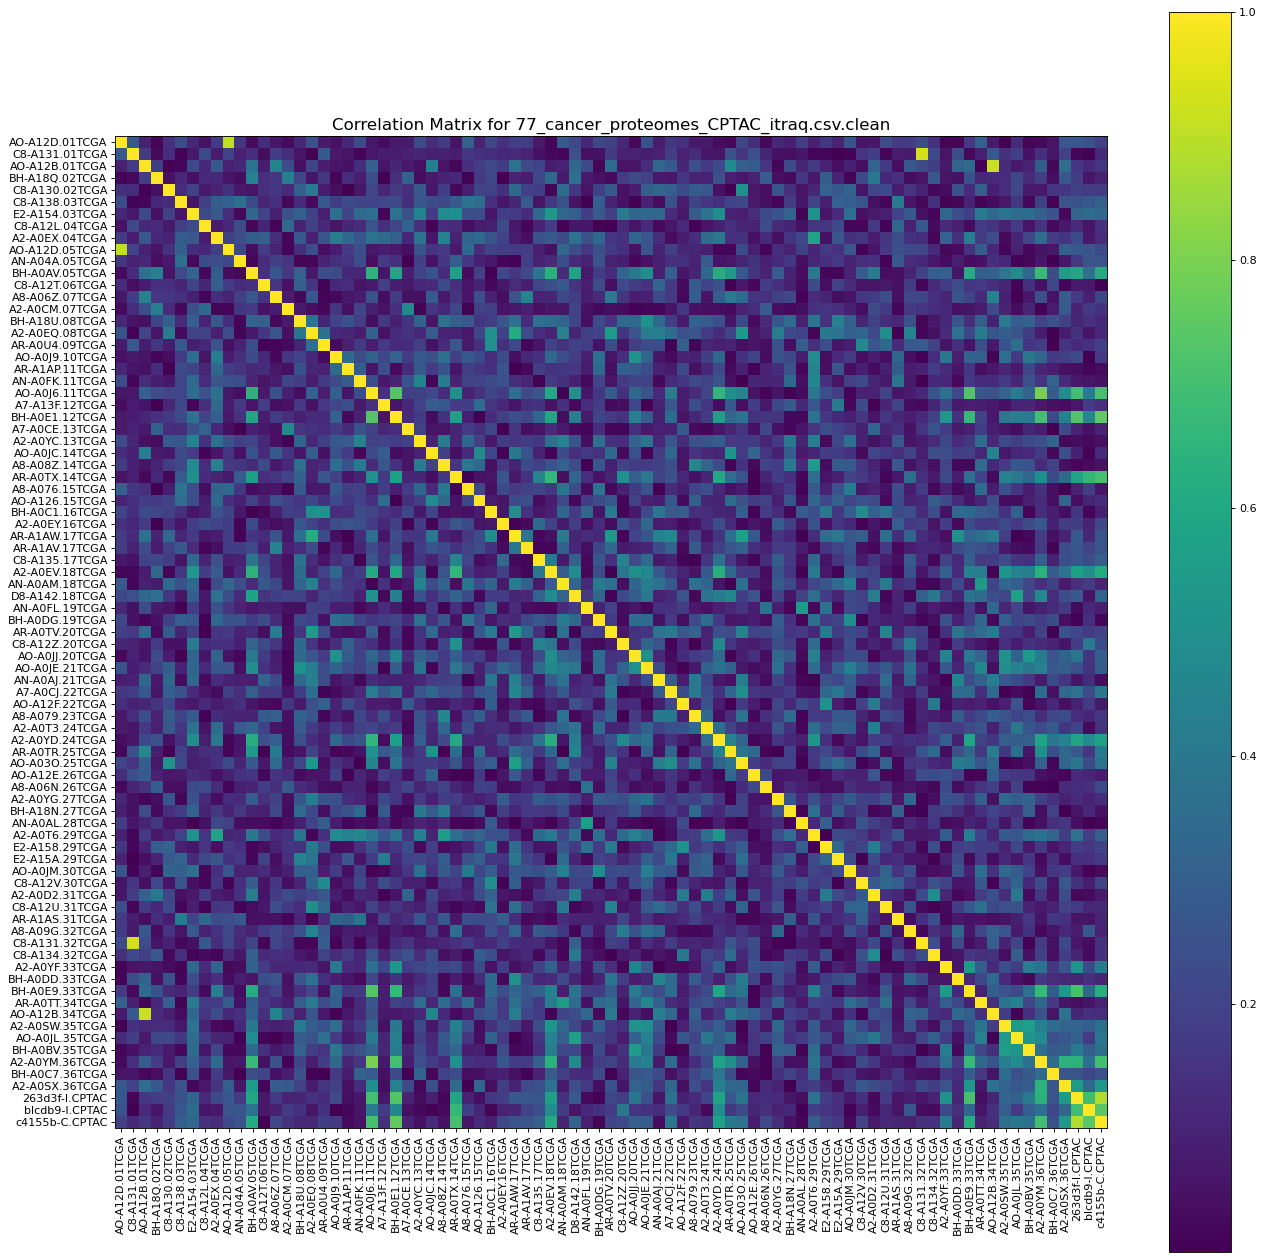

/tmp/ipykernel_3376992/102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


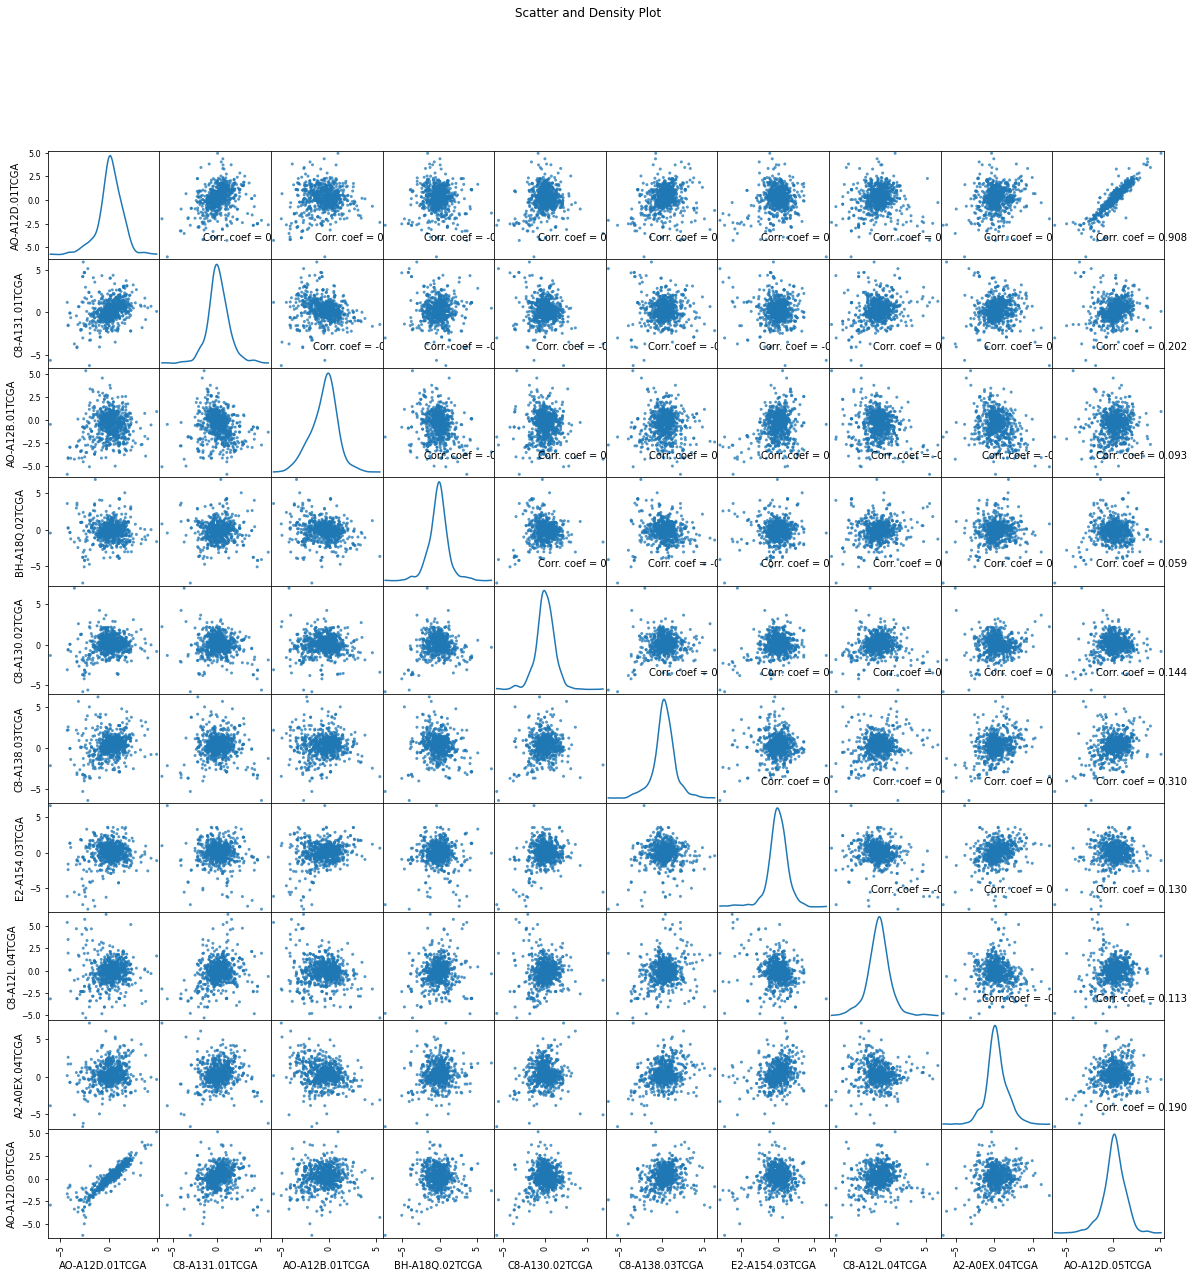

In [9]:
plotPerColumnDistribution(cdf1, 10, 5)
plotCorrelationMatrix(cdf1, 20)
plotScatterMatrix(cdf1, 20, 10)

### B. data breast cancer


In [10]:
nRowsRead = None # specify 'None' if want to read whole file
df2 = pd.read_csv('./dataset/clinical_data_breast_cancer.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'clinical_data_breast_cancer.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 105 rows and 30 columns


In [17]:
df2.head()

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Complete TCGA ID                     105 non-null    object 
 1   Gender                               105 non-null    object 
 2   Age at Initial Pathologic Diagnosis  105 non-null    int64  
 3   ER Status                            105 non-null    object 
 4   PR Status                            105 non-null    object 
 5   HER2 Final Status                    105 non-null    object 
 6   Tumor                                105 non-null    object 
 7   Tumor--T1 Coded                      105 non-null    object 
 8   Node                                 105 non-null    object 
 9   Node-Coded                           105 non-null    object 
 10  Metastasis                           105 non-null    object 
 11  Metastasis-Coded                

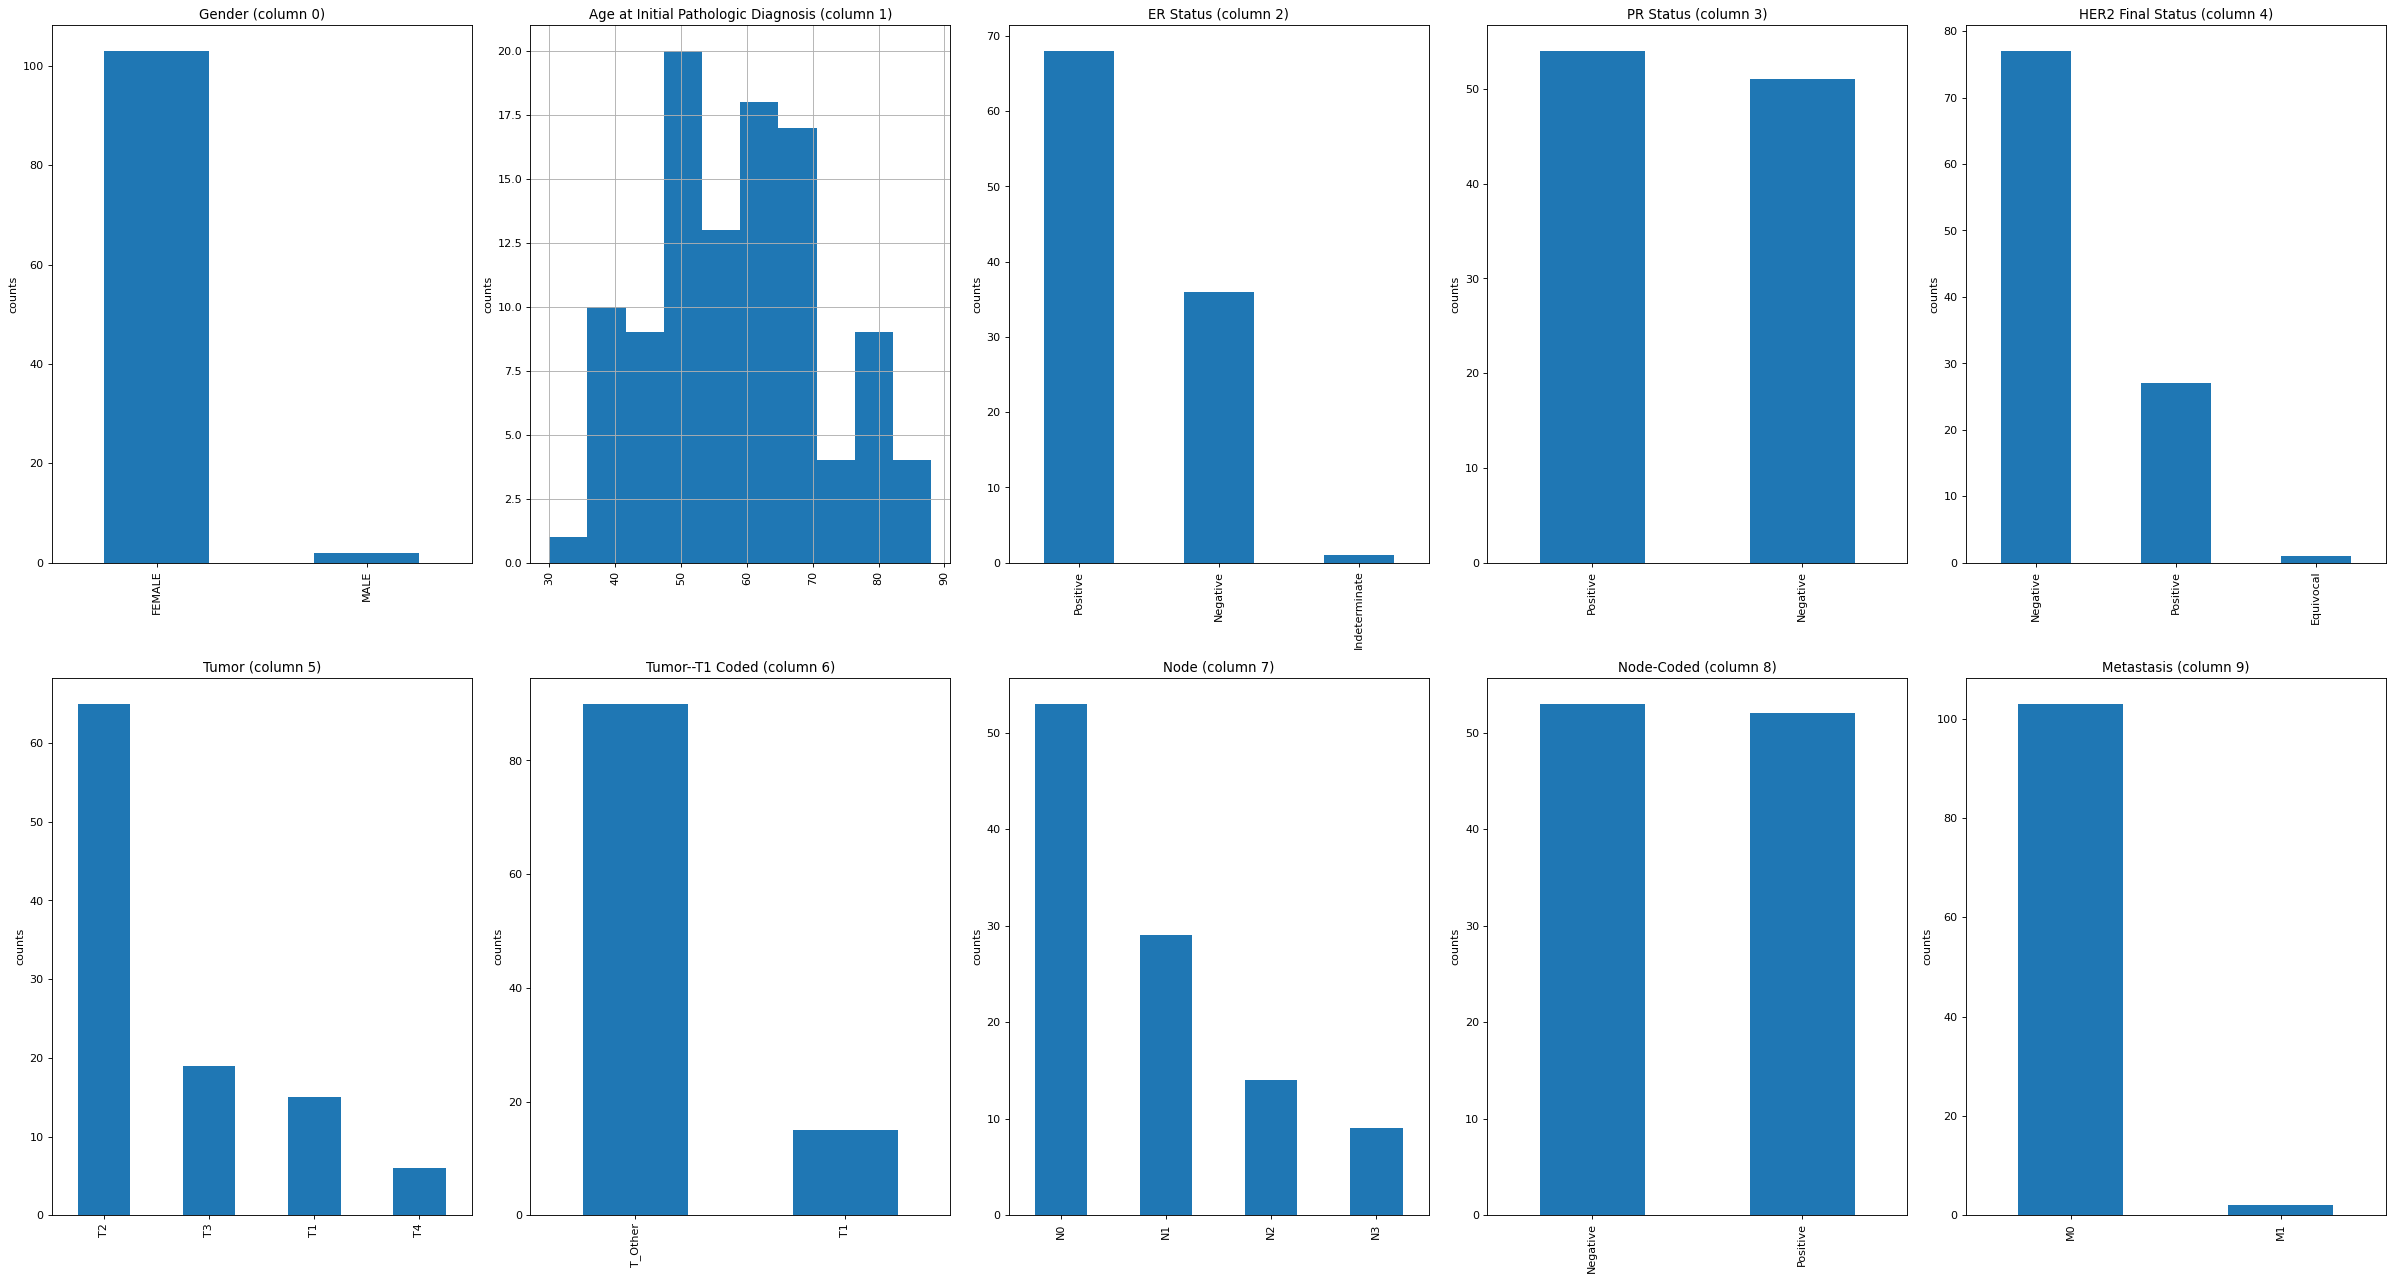

In [12]:
plotPerColumnDistribution(df2, 10, 5)

/tmp/ipykernel_3376992/2509224368.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


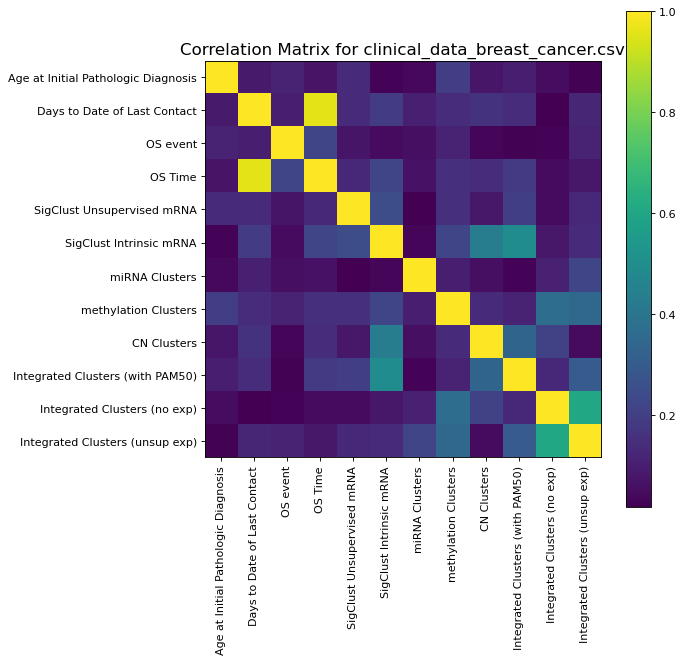

/tmp/ipykernel_3376992/102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


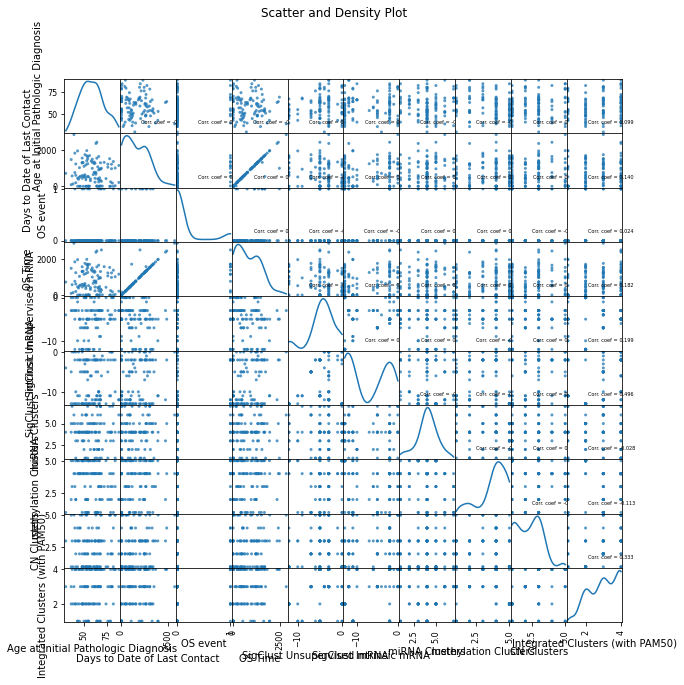

In [13]:
plotCorrelationMatrix(df2, 8)
plotScatterMatrix(df2, 10, 5)

### C. cancer proteins


In [14]:


nRowsRead = None # specify 'None' if want to read whole file
df3 = pd.read_csv('./dataset/PAM50_proteins.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'PAM50_proteins.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')




There are 100 rows and 4 columns


In [19]:
df3.head()

,GeneSymbol,RefSeqProteinID,Species,Gene Name
0,MIA,NP_006524,Homo sapiens,melanoma inhibitory activity
1,FGFR4,NP_002002,Homo sapiens,fibroblast growth factor receptor 4
2,FGFR4,NP_998812,Homo sapiens,fibroblast growth factor receptor 4
3,FGFR4,NP_075252,Homo sapiens,fibroblast growth factor receptor 4
4,GPR160,NP_055188,Homo sapiens,G protein-coupled receptor 160


In [15]:
df3.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   GeneSymbol       100 non-null    object
 1   RefSeqProteinID  100 non-null    object
 2   Species          100 non-null    object
 3   Gene Name        100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [16]:
# plotCorrelationMatrix(df3, 8)
# plotScatterMatrix(df3, 10, 5)